Step 2b.2
      width < 10: 34706
10 <= width < 20: 57250
20 <= width < 30: 24885
30 <= width < 40: 13338
40 <= width < 50: 8011
50 <= width     : 20699
----------------------------------
Step 2b.3
       width/height < 0.6: 7720
0.6 <= width/height < 0.7: 22966
0.7 <= width/height < 0.8: 46997
0.8 <= width/height < 0.9: 45458
0.9 <= width/height < 1.0: 16786
1.0 <= width/height      : 18962
----------------------------------
Step 2b.4


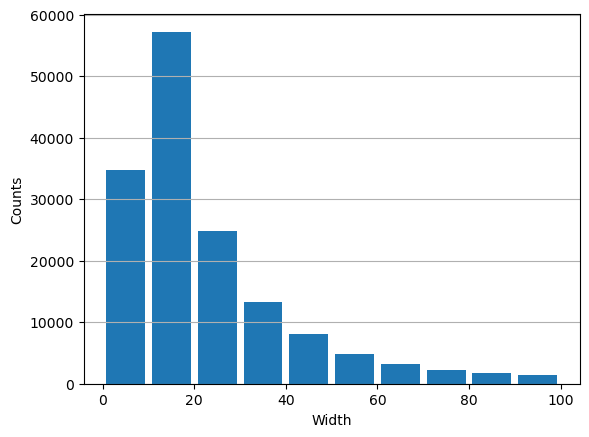

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if __name__ == '__main__':
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()
    # Enter your code here (25%)
    widths = []
    heights = []
    count_invalid_bbox = 0 # count the invalid bbox in total
    dict_range = {i: 0 for i in range(0, 51, 10)} # save the counting number of each range in step2b.2 (about width)
    # save the counting number of each range in step2b.3 (about width/height)
    dict_ratio_range = {
      0:0,
      0.6:0,
      0.7:0,
      0.8:0,
      0.9:0,
      1.0:0
    } 
    # You might use the following to access each line
    # calculate the total width and height of valid bboxes
    for line in lines:
      img_name = line.strip().split(' ')[0]
      arr_bbox = np.array(list(map(int, line.strip().split(' ')[1:]))) # convert type into integer
      arr_bbox = np.reshape(arr_bbox, (-1, 4))
      for bbox in arr_bbox:
        x1, y1, x2, y2 = bbox
        if not(x1 >= 0 and y1 >= 0 and x2 > x1 and y2 > y1): # invalid bbox
          # print(f"\033[91m({x1}, {y1}, {x2}, {y2}) is not a valid bbox, so skip this bbox.\033[0m")
          count_invalid_bbox += 1 # one invalid bbox found
          continue
        # cal size of bbox
        widths.append(x2 - x1 + 1)
        heights.append(y2 - y1 + 1)
      

    # Step 2b.2: count the number of each range
    for i in widths:
      for lower_bound in sorted(dict_range.keys(), reverse=True):
        if i >= lower_bound: # then, i is in this range, so count 1, and break
          dict_range[lower_bound] += 1
          break
    print("Step 2b.2")
    # Step 2b.2: print the number of each range from width
    for i in dict_range.keys():
      if i == 0:
        print(f"{' ' * 6}width < {i+10}: {dict_range[i]}")
      elif i == 50:
        print(f"{i} <= width{' ' * 5}: {dict_range[i]}")
      else:
        print(f"{i} <= width < {i+10}: {dict_range[i]}")
      


    # Step 2b.3: count the number of each range counted from width/height
    for w, h in zip(widths, heights):
      ratio = w / h
      for lower_bound in sorted(dict_ratio_range.keys(), reverse=True):
        if ratio >= lower_bound: # then, i is in this range, so count 1, and break
          dict_ratio_range[lower_bound] += 1
          break
    print("----------------------------------\nStep 2b.3")
    # Step 2b.3: print the number of each range counted from width/height
    for i in dict_ratio_range.keys():
      if i == 0:
        print(f"{' ' * 7}width/height < {i+0.6:.1f}: {dict_ratio_range[i]}")
      elif i == 1.0:
        print(f"{i:.1f} <= width/height{' ' * 6}: {dict_ratio_range[i]}")
      else:
        print(f"{i:.1f} <= width/height < {i+0.1:.1f}: {dict_ratio_range[i]}")
    
    print("----------------------------------\nStep 2b.4")
    # Step 2b.4: plot the statistic image
    plt.hist(widths, range(0,101,10), rwidth=0.85)
    plt.grid(True, axis='y')
    plt.xlabel("Width")
    plt.ylabel("Counts")
    plt.show()

In [6]:
# Step 2b.5: In Step 2b.1, we only consider valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.
# In above code, when reading each bbox, there is one if-statement to decide whether this bbox is valid or not. 
# If this bbox is invalid, I declare a variable `count_invalid_bbox` to count all invalid bboxes.
print(f"Number of invalid bounding boxes: {count_invalid_bbox}")

Number of invalid bounding boxes: 535
